In [1]:
import numpy as np
import pandas as pd
pd.set_option("max_r", 100)
pd.get_option("display.max_rows")
pd.options.display.max_columns = None
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

### Source:

For the data:<br>
[Kaggle](https://www.kaggle.com/donorschoose/io#Projects.csv)

For data schema (different version, some fields don't apply or are outdated):<br>
[OpenData Docs](https://research.donorschoose.org/t/opedata-layout-and-docs/18)

### 1. First Data Exploration by csv file:

In [2]:
donations = pd.read_csv('data/Donations.csv')

In [3]:
donors = pd.read_csv('data/Donors.csv',low_memory=False)

In [4]:
projects = pd.read_csv('data/Projects.csv',low_memory=False)

In [5]:
resources = pd.read_csv('data/Resources.csv',low_memory=False)

In [6]:
schools = pd.read_csv('data/Schools.csv',low_memory=False)

In [7]:
teachers = pd.read_csv('data/Teachers.csv',low_memory=False)

#### 1.1 Donations:

In [8]:
shape_don = donations.shape
null_values_don = donations.isna().sum()
dtypes_don = donations.dtypes

print('The data shape is:',shape_don)
print('The null values per column are:', null_values_don)
print("The datatypes per column are:", dtypes_don)
'''
1) Donation received data from object to datetime
2) Join with donor id and project id
'''
donations.columns = donations.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

The data shape is: (4687884, 7)
The null values per column are: Project ID                             0
Donation ID                            0
Donor ID                               0
Donation Included Optional Donation    0
Donation Amount                        0
Donor Cart Sequence                    0
Donation Received Date                 0
dtype: int64
The datatypes per column are: Project ID                              object
Donation ID                             object
Donor ID                                object
Donation Included Optional Donation     object
Donation Amount                        float64
Donor Cart Sequence                      int64
Donation Received Date                  object
dtype: object


In [9]:
donations.head()

,project_id,donation_id,donor_id,donation_included_optional_donation,donation_amount,donor_cart_sequence,donation_received_date
0,000009891526c0ade7180f8423792063,688729120858666221208529ee3fc18e,1f4b5b6e68445c6c4a0509b3aca93f38,No,178.37,11,2016-08-23 13:15:57
1,000009891526c0ade7180f8423792063,dcf1071da3aa3561f91ac689d1f73dee,4aaab6d244bf3599682239ed5591af8a,Yes,25.00,2,2016-06-06 20:05:23
2,000009891526c0ade7180f8423792063,18a234b9d1e538c431761d521ea7799d,0b0765dc9c759adc48a07688ba25e94e,Yes,20.00,3,2016-06-06 14:08:46
3,000009891526c0ade7180f8423792063,38d2744bf9138b0b57ed581c76c0e2da,377944ad61f72d800b25ec1862aec363,Yes,25.00,1,2016-05-15 10:23:04
4,000009891526c0ade7180f8423792063,5a032791e31167a70206bfb86fb60035,6d5b22d39e68c656071a842732c63a0c,Yes,25.00,2,2016-05-17 01:23:38


In [10]:
len(donations['project_id'].unique())
# as opposed to 4687884 rows in total

901965

In [11]:
donations.describe() 

,donation_amount,donor_cart_sequence
count,4.687884e+06,4.687884e+06
mean,6.066879e+01,1.430545e+02
std,1.668996e+02,8.723086e+02
min,1.000000e-02,1.000000e+00
25%,1.482000e+01,1.000000e+00
50%,2.500000e+01,2.000000e+00
75%,5.000000e+01,1.200000e+01
max,6.000000e+04,1.811600e+04


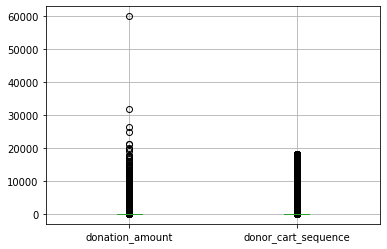

In [12]:
boxplot = donations.boxplot(column=['donation_amount','donor_cart_sequence']) # high amount of outliers/right skewed.

In [13]:
print(len(donations['donation_id'].unique()) == (len(donations)))
print(len(donations['donation_id'].unique()))
print(len(donations))

False
4687844
4687884


In [14]:
duplicateRowsDF = donations[donations.duplicated()]

In [15]:
duplicateRowsDF #while there are duplicate donation id's, the rest of the data is not duplicated. 

,project_id,donation_id,donor_id,donation_included_optional_donation,donation_amount,donor_cart_sequence,donation_received_date


In [16]:
duplicateRowsDF1 = donations[donations.duplicated(['donation_id','project_id','donor_id'])] # however all the id's are duplicates here.

In [17]:
duplicateRowsDF2 = donations[donations.duplicated(['donation_id','project_id','donor_id','donation_included_optional_donation'])] # however all the id's are duplicates here.

In [18]:
len(duplicateRowsDF1) #still the same up to here

40

In [19]:
len(duplicateRowsDF2) #again, still the same amount of duplicates

40

In [20]:
duplicateRowsDF3 = donations[donations.duplicated(['donation_id','project_id','donor_id','donation_included_optional_donation','donation_amount'])] 

In [21]:
len(duplicateRowsDF3)

40

In [22]:
duplicateRowsDF4 = donations[donations.duplicated(['donation_id','project_id','donor_id','donation_included_optional_donation','donation_amount','donor_cart_sequence'])] 

In [23]:
len(duplicateRowsDF4)

40

In [24]:
duplicateRowsDF5 = donations[donations.duplicated(['donation_id','project_id','donor_id','donation_included_optional_donation','donation_amount','donor_cart_sequence','donation_received_date'])] 

In [25]:
len(duplicateRowsDF5) # so the difference lies in received date. Everything else is the same. Data Entry/admin mistake? 

0

In [26]:
duplicate_dates = donations['donation_id'].value_counts().sort_values(ascending=False)
ids = []
for i,v in enumerate(duplicate_dates):
    if v > 1: ids.append(duplicate_dates.index[i])
print(donations[donations['donation_id'].isin(ids)]) 

                               project_id                       donation_id  \
127589   06f4606a2248ae7785ad094d5cbe1a2b  c8689b5750748bdf987f7c2b1ce36c5b   
127590   06f4606a2248ae7785ad094d5cbe1a2b  c8689b5750748bdf987f7c2b1ce36c5b   
157022   0886c7155bfe57c488bcfc68adecc544  d93a8bb381345d10c75aa6e590eae257   
157034   0886c7155bfe57c488bcfc68adecc544  d93a8bb381345d10c75aa6e590eae257   
201918   0af60aa080317cbe8a601709f24c6dc5  ec7fedbc05656a1675898e325598101a   
201919   0af60aa080317cbe8a601709f24c6dc5  ec7fedbc05656a1675898e325598101a   
212456   0b88a1316f38bf17dd030a3ab05a5ca8  3aba50dc6813f02a1de167e8556963be   
212457   0b88a1316f38bf17dd030a3ab05a5ca8  3aba50dc6813f02a1de167e8556963be   
449152   1874e177a91165e71bfaa3cecc7b37bf  3b3ec32441959bc337ad25ad4aeb81b8   
449154   1874e177a91165e71bfaa3cecc7b37bf  3b3ec32441959bc337ad25ad4aeb81b8   
606370   211505c27784a1d0a73119d74f711d4d  a92737584ed38f422e81340466785558   
606371   211505c27784a1d0a73119d74f711d4d  a92737584

In [29]:
# sample comparison: donation received dates for the following project_id are: 2014-09-22 and 2014-09-11.
# apparently the date corresponds to the fully funded date.
projects.loc[projects['project_id'] == '06f4606a2248ae7785ad094d5cbe1a2b']

,project_id,school_id,teacher_id,teacher_project_posted_sequence,project_type,project_title,project_essay,project_short_description,project_need_statement,project_subject_category_tree,project_subject_subcategory_tree,project_grade_level_category,project_resource_category,project_cost,project_posted_date,project_expiration_date,project_current_status,project_fully_funded_date
214550,06f4606a2248ae7785ad094d5cbe1a2b,0c2857d2f5e8dd6bc6c1752bdfa18ff8,1fb1b91e2ffb61340d8abd62e09e3425,80,Teacher-Led,"""Stick"" It to Me","""A good hockey player plays where the puck is....","""A good hockey player plays where the puck is....",My students need hockey sticks and goalie helm...,Health & Sports,"Gym & Fitness, Team Sports",Grades 3-5,Other,585.71,2014-09-01,2014-12-31,Fully Funded,2014-09-22


In [30]:
#2014-05-02 nd 2014-04-15
# same story. So it's a data entry/admin mistake
projects.loc[projects['project_id'] == '0886c7155bfe57c488bcfc68adecc544']

,project_id,school_id,teacher_id,teacher_project_posted_sequence,project_type,project_title,project_essay,project_short_description,project_need_statement,project_subject_category_tree,project_subject_subcategory_tree,project_grade_level_category,project_resource_category,project_cost,project_posted_date,project_expiration_date,project_current_status,project_fully_funded_date
158670,0886c7155bfe57c488bcfc68adecc544,fb267cca69cef1d767ac6a5b3061d7a4,55fa1bd5e7c9d700224b786beb820e57,1,Teacher-Led,Swimming in the Desert,"One year ago, not a single one of my students ...","One year ago, not a single one of my students ...","My students need fins, pull buoys, and paddles...","Math & Science, Health & Sports","Health & Life Science, Team Sports",Grades 9-12,Supplies,1091.25,2014-04-06,2014-08-06,Fully Funded,2014-05-02


In [130]:
# this concerns the California dataset
print(projects.loc[projects['project_id'] == 'dadbbac4bd9c696f28590ffe80b01756']['project_short_description'])
print(projects.iloc[7506]['project_essay'])

7506    Technology is the pen and paper of our time. T...
Name: project_short_description, dtype: object
Technology is the pen and paper of our time.  Technology is changing education and it is so important that computers are an integral part of each and every classroom.   <!--DONOTREMOVEESSAYDIVIDER-->My students are a very hard-working, intelligent group of 5th graders. Our school is a Title 1 school. 100% of our students receive free lunch. Many of our families live in a high poverty area and face issues such as gang violence, illiteracy, and low family income. Our school has been excelling in the areas of math and language arts due to the hard work of our teachers, staff, and students.  <!--DONOTREMOVEESSAYDIVIDER-->I am requesting 1 iPad and 1 iPad case for my classroom. There are many things that I think an iPad would provide for my students.  An iPad in the classroom would be a great source of motivation!  An iPad would enable my students to receive equal access to the latest te

In [132]:
print(projects.loc[projects['project_id'] == '1c69d4045dafd030f67d6bc193b1a4f3']['project_short_description'])
print(projects.iloc[26534]['project_essay'])

26534    "Intelligence plus character- that is the goal...
Name: project_short_description, dtype: object
"Intelligence plus character- that is the goal of true education," Martin Luther King, Jr. said, and this could not be truer with my students today. If a student has intelligence, he will succeed in school. If a student has intelligence plus character, he will succeed in life.
 <!--DONOTREMOVEESSAYDIVIDER-->My students are faced with many challenges, challenges that impede them from building on both intelligence and character. They live in an extremely low-income community. They are faced with violence and drugs, and often live in crowded homes. The school provides them with a safe environment in which they can build upon their character and intelligence. Unfortunately, the limited resources often make it difficult. <!--DONOTREMOVEESSAYDIVIDER-->Often times, the hardships that students encounter prevent them from receiving the educational tools they need. Therefore, the resources t

In [31]:
projects.loc[projects['project_id'] == '1874e177a91165e71bfaa3cecc7b37bf']
#2014-03-24 and  2014-04-03

,project_id,school_id,teacher_id,teacher_project_posted_sequence,project_type,project_title,project_essay,project_short_description,project_need_statement,project_subject_category_tree,project_subject_subcategory_tree,project_grade_level_category,project_resource_category,project_cost,project_posted_date,project_expiration_date,project_current_status,project_fully_funded_date
142009,1874e177a91165e71bfaa3cecc7b37bf,cef254635c2095e07e12fbc23d3c605c,8577a60885a5e7023d7aa26252b1801b,1,Teacher-Led,Supply Our Band Bucks Store!!!,Wouldn't you like to help maintain the high mo...,Wouldn't you like to help maintain the high mo...,"My students need reeds, oils, and cleaners as ...",Music & The Arts,"Music, Performing Arts",Grades 6-8,Supplies,470.11,2014-02-19,2014-04-11,Fully Funded,2014-04-03


#### Comment:

It is not consistently the first or second duplicate that is wrong. The 'bad' duplicates are copied from project fully_funded, and it's the earlier date that is correct.

In [32]:
donations = donations.sort_values('donation_received_date').drop_duplicates('donation_id',keep='first')

In [33]:
print(len(donations['donation_id'].unique()) == (len(donations)))

True


#### 1.2 Donors:

In [34]:
shape = donors.shape
null_values = donors.isna().sum()
null_percentage = (donors.isna().mean().round(4) * 100)
data_types = donors.dtypes

print('The data shape is:',shape)
print('The null values per column are:', null_values)
print('The null value percentage per column are:', null_percentage)
print("The datatypes per column are:", data_types)
''' 
1) Check out missing values
2) Make decision about categorical data
3) join with donation id
4) zip: might not be useful, there are many categorical values for location as is, and it has missing values.
'''
donors.columns = donors.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

The data shape is: (2122640, 5)
The null values per column are: Donor ID                 0
Donor City          213097
Donor State              0
Donor Is Teacher         0
Donor Zip           180060
dtype: int64
The null value percentage per column are: Donor ID             0.00
Donor City          10.04
Donor State          0.00
Donor Is Teacher     0.00
Donor Zip            8.48
dtype: float64
The datatypes per column are: Donor ID            object
Donor City          object
Donor State         object
Donor Is Teacher    object
Donor Zip           object
dtype: object


In [35]:
donors.describe()

,donor_id,donor_city,donor_state,donor_is_teacher,donor_zip
count,2122640,1909543,2122640,2122640,1942580
unique,2122640,15204,52,2,1065
top,9d02bb92d08fd088814690c4df044cab,Chicago,California,No,606
freq,1,34352,294695,1910355,35047


In [36]:
print(len(donors['donor_id'].unique()) == (len(donors)))

True


In [37]:
donors.head()

,donor_id,donor_city,donor_state,donor_is_teacher,donor_zip
0,00000ce845c00cbf0686c992fc369df4,Evanston,Illinois,No,602
1,00002783bc5d108510f3f9666c8b1edd,Appomattox,other,No,245
2,00002d44003ed46b066607c5455a999a,Winton,California,Yes,953
3,00002eb25d60a09c318efbd0797bffb5,Indianapolis,Indiana,No,462
4,0000300773fe015f870914b42528541b,Paterson,New Jersey,No,075


In [38]:
donors.drop(['donor_city', 'donor_zip'], axis=1, inplace=True) # we have donor state. City and Zip account for 10.04% and 8.48% of missing values respetively.

In [39]:
donors.head()

,donor_id,donor_state,donor_is_teacher
0,00000ce845c00cbf0686c992fc369df4,Illinois,No
1,00002783bc5d108510f3f9666c8b1edd,other,No
2,00002d44003ed46b066607c5455a999a,California,Yes
3,00002eb25d60a09c318efbd0797bffb5,Indiana,No
4,0000300773fe015f870914b42528541b,New Jersey,No


####  1.2.1 A first look at Donors and Donations:

In [40]:
donations_donors = pd.merge(donations, donors, left_on='donor_id', right_on='donor_id')

In [41]:
donations_donors.head()

,project_id,donation_id,donor_id,donation_included_optional_donation,donation_amount,donor_cart_sequence,donation_received_date,donor_state,donor_is_teacher
0,3cef9c6b38eb98b50ab9d82616a95fef,fdb6b2832434cba2fc52452829ca28d1,fcf96e729bf1b03dfbd8f07a3b4ee173,Yes,25.00,2,2012-10-08 13:53:00,New York,Yes
1,3cef9c6b38eb98b50ab9d82616a95fef,4c83f056862fecb03fdd34ed76587549,fcf96e729bf1b03dfbd8f07a3b4ee173,No,50.00,3,2012-12-19 11:25:45,New York,Yes
2,3cef9c6b38eb98b50ab9d82616a95fef,a87e5de89545bbd00ca704836b232151,fcf96e729bf1b03dfbd8f07a3b4ee173,No,100.00,4,2013-01-24 11:42:13,New York,Yes
3,3cef9c6b38eb98b50ab9d82616a95fef,0d0fbccdcd7384669746a5ac152664f5,fcf96e729bf1b03dfbd8f07a3b4ee173,Yes,696.76,5,2013-02-11 10:30:31,New York,Yes
4,c83f962d03001868d5420c8b0ba36065,4932c4af738be0d5899e14ced5fc9a58,fcf96e729bf1b03dfbd8f07a3b4ee173,Yes,25.00,6,2013-10-01 14:38:52,New York,Yes


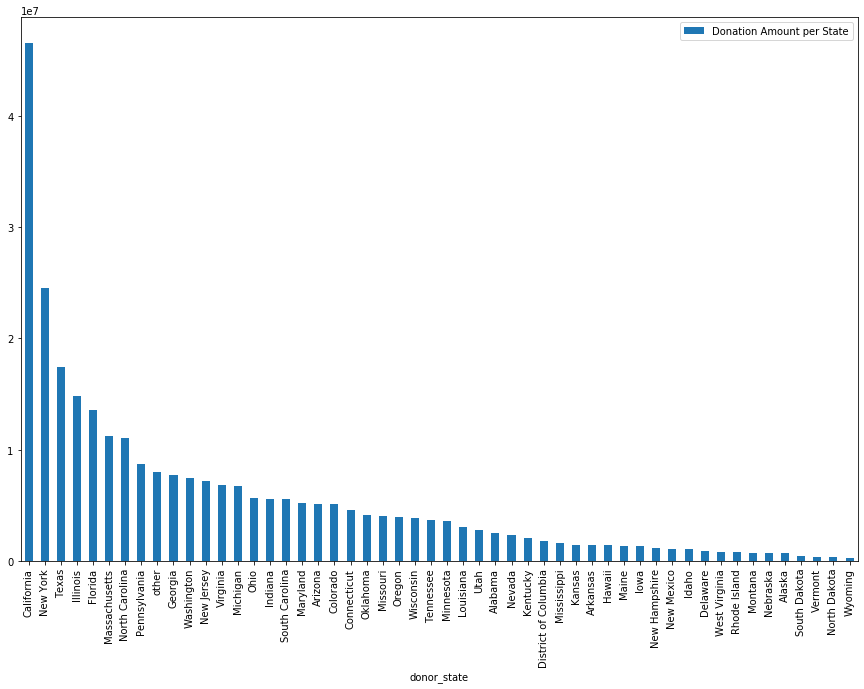

In [42]:
pvt = donations_donors.pivot_table(index=['donor_state'], values=['donation_amount'], aggfunc={'donation_amount': sum})
pvt_sort = pvt.sort_values(('donation_amount'), ascending=False,)

chart = pvt_sort.plot(kind='bar',figsize=(15,10))
chart.legend(['Donation Amount per State'])

#### 1.3 Projects:

In [44]:
shape_pr = projects.shape
null_values_pr = projects.isna().sum()
null_percentage_pr = projects.isna().mean().round(4) * 100
data_types_pr = projects.dtypes
latest_project = projects['project_posted_date'].max()
oldest_project = projects['project_posted_date'].min()

print('The data shape is:',shape_pr)
print('The null values per column are:', null_values_pr)
print('The null value percentage per column are:', null_percentage_pr)
print("The datatypes per column are:", data_types_pr)
print('The latest project was posted on:', latest_project)
print('The oldest project was posted on:', oldest_project)
# Project fully funded is interesting: NaN values indicate the project did not reach its goal. 
# In this dataset, 25.52% does not have a Project Fully Funded Date, meaning they did not reach their goal, or the project expired.

projects.columns = projects.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

The data shape is: (1110017, 18)
The null values per column are: project_id                               0
school_id                                0
teacher_id                               0
teacher_project_posted_sequence          0
project_type                             0
project_title                            6
project_essay                            1
project_short_description                3
project_need_statement                   3
project_subject_category_tree           29
project_subject_subcategory_tree        29
project_grade_level_category             0
project_resource_category               36
project_cost                             0
project_posted_date                      0
project_expiration_date                 14
project_current_status                   0
project_fully_funded_date           283253
dtype: int64
The null value percentage per column are: project_id                           0.00
school_id                            0.00
teacher_id            

In [45]:
print(len(projects['project_id'].unique()) == (len(projects)))
print(len(projects['project_id'].unique()))
print(len(projects)) # so there's double IDs. 

False
1110015
1110017


In [46]:
duplicates_project = projects[projects.duplicated(['project_id'])]


In [47]:
duplicates_project

,project_id,school_id,teacher_id,teacher_project_posted_sequence,project_type,project_title,project_essay,project_short_description,project_need_statement,project_subject_category_tree,project_subject_subcategory_tree,project_grade_level_category,project_resource_category,project_cost,project_posted_date,project_expiration_date,project_current_status,project_fully_funded_date
983535,99c07777fdcf63d3a0fdb4a0deb4b012,de69b6ee78c74d4356bf3302a649fb1e,05f09b29bc8fd4f3cc10fc75eccbb573,11,Professional Development,Newspaper Advisers Learn Financial Literacy in...,Period 6 in Room 428 is a hub of activity as s...,Period 6 in Room 428 is a hub of activity as s...,"For the journalism conference, I need a reason...","History & Civics, Literacy & Language","Financial Literacy, Literature & Writing",Grades 9-12,Trips,644.29,2018-01-07,2018-03-13,Fully Funded,2018-01-07
1041433,c940d0e78b7559573aca536db90c0646,5e1132a3628825b31f329a70fcec7030,69b63ccd52afd09ef3963b4cc3b15d00,1,Professional Development,Creative Computing in Scratch (3-8),Ms. Sheila!!! \n\nI'm sooooo excited we are...,Ms. Sheila!!! \n\nI'm sooooo excited we are go...,My students need access to trained teachers in...,Special Needs,Special Needs,Grades 3-5,Trips,2421.14,2018-03-21,2018-06-03,Fully Funded,2018-03-27


In [48]:
duplicates_project1 = projects[projects.duplicated(['project_id','school_id','teacher_id',])]
duplicates_project1

,project_id,school_id,teacher_id,teacher_project_posted_sequence,project_type,project_title,project_essay,project_short_description,project_need_statement,project_subject_category_tree,project_subject_subcategory_tree,project_grade_level_category,project_resource_category,project_cost,project_posted_date,project_expiration_date,project_current_status,project_fully_funded_date
983535,99c07777fdcf63d3a0fdb4a0deb4b012,de69b6ee78c74d4356bf3302a649fb1e,05f09b29bc8fd4f3cc10fc75eccbb573,11,Professional Development,Newspaper Advisers Learn Financial Literacy in...,Period 6 in Room 428 is a hub of activity as s...,Period 6 in Room 428 is a hub of activity as s...,"For the journalism conference, I need a reason...","History & Civics, Literacy & Language","Financial Literacy, Literature & Writing",Grades 9-12,Trips,644.29,2018-01-07,2018-03-13,Fully Funded,2018-01-07
1041433,c940d0e78b7559573aca536db90c0646,5e1132a3628825b31f329a70fcec7030,69b63ccd52afd09ef3963b4cc3b15d00,1,Professional Development,Creative Computing in Scratch (3-8),Ms. Sheila!!! \n\nI'm sooooo excited we are...,Ms. Sheila!!! \n\nI'm sooooo excited we are go...,My students need access to trained teachers in...,Special Needs,Special Needs,Grades 3-5,Trips,2421.14,2018-03-21,2018-06-03,Fully Funded,2018-03-27


In [49]:
duplicates_project2 = projects[projects.duplicated()]
duplicates_project2 # so there is A difference, but what.

,project_id,school_id,teacher_id,teacher_project_posted_sequence,project_type,project_title,project_essay,project_short_description,project_need_statement,project_subject_category_tree,project_subject_subcategory_tree,project_grade_level_category,project_resource_category,project_cost,project_posted_date,project_expiration_date,project_current_status,project_fully_funded_date


In [50]:
duplicates = projects['project_id'].value_counts().sort_values(ascending=False)
ids = []
for i,v in enumerate(duplicates):
    if v > 1: ids.append(duplicates.index[i])
print(projects[projects['project_id'].isin(ids)]) 
# the only difference seems to be the project type. I suppose they belong to both project types (Teacher-led and Professional Development)

                               project_id                         school_id  \
983393   99c07777fdcf63d3a0fdb4a0deb4b012  de69b6ee78c74d4356bf3302a649fb1e   
983535   99c07777fdcf63d3a0fdb4a0deb4b012  de69b6ee78c74d4356bf3302a649fb1e   
1041063  c940d0e78b7559573aca536db90c0646  5e1132a3628825b31f329a70fcec7030   
1041433  c940d0e78b7559573aca536db90c0646  5e1132a3628825b31f329a70fcec7030   

                               teacher_id  teacher_project_posted_sequence  \
983393   05f09b29bc8fd4f3cc10fc75eccbb573                               11   
983535   05f09b29bc8fd4f3cc10fc75eccbb573                               11   
1041063  69b63ccd52afd09ef3963b4cc3b15d00                                1   
1041433  69b63ccd52afd09ef3963b4cc3b15d00                                1   

                     project_type  \
983393                Teacher-Led   
983535   Professional Development   
1041063               Teacher-Led   
1041433  Professional Development   

                           

In [51]:
print(projects.iloc[983393]['project_essay'])
print(projects.iloc[983393]['project_need_statement'])

Period 6 in Room 428 is a hub of activity as students work in teams  to create website stories, and individually, or with a photographer, in reporting newspaper stories. The page editors, copy editors, and managing editor keep everything from going off track. After sitting through five classes, many of them Advanced Placement, students are happy to be able to move around and to make their own decisions. 

My job is to teach them the skills, ethics and finances involved in publishing a newspaper and to help them make smart choices. Sometimes I help put out fires, other times I sit back and enjoy the conversations between students as they work to solve their problems. These range from not having a reporter available to cover an event after school, to none of the photos taken of a story being high quality, to trying to sell an advertisement that will pay for the printing of the newspaper. <!--DONOTREMOVEESSAYDIVIDER-->As a former journalist, I am at ease with teaching students how to repo

In [52]:
print(projects.iloc[1041063]['project_essay'])
print(projects.iloc[1041063]['project_need_statement'])

Ms. Sheila!!!    

I'm sooooo excited we are going to the city!!

This was one of six students blurting out similar things.  You might not know it if you meet them but my students are autistic.  We attended a Little Bits workshop today and they blew me away.

They created a 3 d model of Cinderella's Pumpkin Carriage that actually moved using little bits!!

I was only able to take 3 out of 8 students because I have very few "Little Bit" to go around.  I would love more kits for each student to explore and create individually.

I am a computer science teacher who has been working on coding (scratch, code.org, tynker etc) with these students.  Having more Little Bits would bring hands-on materials that could expand their knowledge of computer science.

 <!--DONOTREMOVEESSAYDIVIDER-->I am currently a Software Engineering (computer science teacher) trained in 6-8grade. My students are all on the Autism Spectrum. I have been teaching CS for 2 years and it has been amazing.  

I will be worki

From [DonorsChoose](https://help.donorschoose.org/hc/en-us/articles/204363783-Creating-a-Professional-Development-Project):

"Professional Development refers to a wide variety of specialized materials or training, including conferences or classes, intended to help teachers improve their professional knowledge, competence, skill, and effectiveness."

In [53]:
# These are both Professional Development projects.

projects = projects.drop_duplicates(subset='project_id', keep='last', inplace=False)

In [54]:
print(len(projects['project_id'].unique()) == (len(projects)))

True


In [55]:
projects.loc[projects['project_id'] == '99c07777fdcf63d3a0fdb4a0deb4b012'] # checking to see I kept the right one.

,project_id,school_id,teacher_id,teacher_project_posted_sequence,project_type,project_title,project_essay,project_short_description,project_need_statement,project_subject_category_tree,project_subject_subcategory_tree,project_grade_level_category,project_resource_category,project_cost,project_posted_date,project_expiration_date,project_current_status,project_fully_funded_date
983535,99c07777fdcf63d3a0fdb4a0deb4b012,de69b6ee78c74d4356bf3302a649fb1e,05f09b29bc8fd4f3cc10fc75eccbb573,11,Professional Development,Newspaper Advisers Learn Financial Literacy in...,Period 6 in Room 428 is a hub of activity as s...,Period 6 in Room 428 is a hub of activity as s...,"For the journalism conference, I need a reason...","History & Civics, Literacy & Language","Financial Literacy, Literature & Writing",Grades 9-12,Trips,644.29,2018-01-07,2018-03-13,Fully Funded,2018-01-07


### On Project Status fields:

[Source](https://research.donorschoose.org/t/opedata-layout-and-docs/18)

These fields provide status information and dates for when a project reached their milestones. **Dates will be null if the project did not reach that particular milestone.** For example, if a project was posted but not completed, the date_completed would be null while the date_posted would have a date.

funding_status refers to the status of this project as of the date the dataset was created. **Reallocated projects** are projects that received partial funding but the project never completed, so the donations were moved towards another project. **Completed projects** refer to projects that received full funding. **Expired projects** are ones that expired before donations were made. **Live projects** are projects that were still open for donations on the day the dataset was created.

**funding_status:** Completed, Expired, Live, or Reallocated<br>
**date_posted:** Date a project was approved by staff to be listed on the site<br>
**date_completed:** Date a project become fully funded<br>
**date_expiration:** Date the project was set to expire and be delisted from the site<br>

In [56]:
filtered_nan = projects[(projects['project_posted_date'].isnull()) & (projects['project_fully_funded_date'].isnull())]
filtered_nan #good news. Means there are no actual missing values here/it follows the rules set above.

,project_id,school_id,teacher_id,teacher_project_posted_sequence,project_type,project_title,project_essay,project_short_description,project_need_statement,project_subject_category_tree,project_subject_subcategory_tree,project_grade_level_category,project_resource_category,project_cost,project_posted_date,project_expiration_date,project_current_status,project_fully_funded_date


In [57]:
filtered_fully_funded_nan = projects[(projects['project_fully_funded_date'].isnull())]

In [58]:
filtered_fully_funded_nan['project_current_status'].unique()

array(['Expired', 'Live'], dtype=object)

In [59]:
filtered_fully_funded_nan.head()

,project_id,school_id,teacher_id,teacher_project_posted_sequence,project_type,project_title,project_essay,project_short_description,project_need_statement,project_subject_category_tree,project_subject_subcategory_tree,project_grade_level_category,project_resource_category,project_cost,project_posted_date,project_expiration_date,project_current_status,project_fully_funded_date
1,f9f4af7099061fb4bf44642a03e5c331,08b20f1e2125103ed7aa17e8d76c71d4,cca2d1d277fb4adb50147b49cdc3b156,3,Teacher-Led,Learning in Color!,"Help us have a fun, interactive listening cent...","Help us have a fun, interactive listening cent...","My students need a listening center, read alon...","Applied Learning, Literacy & Language","Early Development, Literacy",Grades PreK-2,Technology,512.85,2013-01-01,2013-05-31,Expired,NaN
7,4202c4e251fe483dfd93520da022f987,2265238757b794fceba04d6e07ff29a1,7caacabf97a3972e1d07d4a575bc0f3c,57,Teacher-Led,Come Read UPFRONT,"Current events, news, and non-fiction articles...","Current events, news, and non-fiction articles...","My students need a class set of high interest,...",Literacy & Language,"Literacy, Literature & Writing",Grades 6-8,Books,566.19,2013-01-01,2013-05-31,Expired,NaN
13,49409b4858006bbfba35c36338e10ee7,318346a55244fb197ce8eafbf01b838e,0b163977c92e419cf2823eb5cfb3439c,2,Teacher-Led,"""I Don't Have A Good Pencil Or Eraser Today!""",We have tried having communities of materials ...,We have tried having communities of materials ...,"My students need a pencil sharpener, 12 packs ...","History & Civics, Math & Science","Economics, Environmental Science",Grades 3-5,Supplies,294.60,2013-01-01,2013-03-03,Expired,NaN
15,245275cd750ddee64a47512403e47086,c4b1266e41c96af83ef4317f73a3ff39,15908e4d04acfbc33f8d2c6c4aea347c,1,Teacher-Led,Thinking on Our Feet,What student wants to sit in their desk all da...,What student wants to sit in their desk all da...,My students need a class set of iPod Shuffles ...,Literacy & Language,"ESL, Literacy",Grades 3-5,Technology,897.28,2013-01-01,2013-05-31,Expired,NaN
40,fd928b7f6386366a9cad2bea40df4b25,8acbb544c9215b25c71a0c655200baea,8fbd92394e20d647ddcdc6085ce1604b,1,Teacher-Led,Ukuleles For Middle Schoolers,What sound is happier than a ukulele? We have...,What sound is happier than a ukulele? We have ...,My students need 4 ukuleles in order to start ...,Music & The Arts,Music,Grades 6-8,Supplies,420.61,2013-01-01,2013-05-30,Expired,NaN


In [60]:
projects.loc[projects['project_current_status'] == 'Reallocated'] 
# In this dataframe, a project has either completed and will have a fully funded date, or it was not, due to it either being Live, or having Expired (and not reached its goal)
# time to fill these values

,project_id,school_id,teacher_id,teacher_project_posted_sequence,project_type,project_title,project_essay,project_short_description,project_need_statement,project_subject_category_tree,project_subject_subcategory_tree,project_grade_level_category,project_resource_category,project_cost,project_posted_date,project_expiration_date,project_current_status,project_fully_funded_date


In [61]:
projects['project_fully_funded_date'] = np.where(projects['project_current_status'] == 'Expired', '0000', projects['project_fully_funded_date'])

#df['First Season'] = np.where(df['First Season'] > 1990, 1, df['First Season'])

/Users/pmoquette/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [62]:
filtered_expiration_date_nan = projects[(projects['project_expiration_date'].isnull())]
filtered_expiration_date_nan['project_current_status'].unique() # these really are missing values, but we only need to know that they expired.


array(['Expired'], dtype=object)

In [63]:
# despite the error, it appears to work anyway. Probably because I re-ran this code after the merge further below. 
projects['project_expiration_date'] = np.where(projects['project_expiration_date'].isnull(), '0000', projects['project_expiration_date'])

/Users/pmoquette/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [64]:
projects[(projects['project_fully_funded_date'].isnull())] # Also need to tackle the Live projects

,project_id,school_id,teacher_id,teacher_project_posted_sequence,project_type,project_title,project_essay,project_short_description,project_need_statement,project_subject_category_tree,project_subject_subcategory_tree,project_grade_level_category,project_resource_category,project_cost,project_posted_date,project_expiration_date,project_current_status,project_fully_funded_date
1034811,486b625006d71ab21f8592463608e42d,65435ca811b790b366477484cbad5378,933563d32b86678634c51426ecb83be3,1,Teacher-Led,Chromebooks For All Students! No More Fighting...,My students are Special Education Math Middle ...,My students are Special Education Math Middle ...,My students need 12 Chromebooks.,"Math & Science, Special Needs","Mathematics, Special Needs",Grades 6-8,Computers & Tablets,2524.87,2018-03-12,2018-07-17,Live,NaN
1038425,d386d5f58d0388b62b7a7b06e99d1afb,df7e7d4429298ca9c127ca3bec3ef63f,c24cb507ff801f39dbc8c5204423b2e2,102,Student-Led,"Powerful Women in History: Studying Njinga, Wa...","My name is Nacera, and I am a 10th grade stude...",I teach at a Title I school and my students co...,"We need 25 copies of ""Njinga of Angola: Africa...","History & Civics, Literacy & Language","History & Geography, Literacy",Grades 9-12,Books,681.01,2018-03-17,2018-07-15,Live,NaN
1038570,abd2631ada10761150684d6a4948c802,fdee7d9af446cf2514273a750c0518f8,a93d4b7c6bfa54574a5b0f3682f6fd5c,1,Teacher-Led,New Classroom Library,I teach reading in the third largest school di...,I teach reading in the third largest school di...,My students need new books and supplies for th...,Literacy & Language,"ESL, Literacy",Grades 9-12,Books,1216.15,2018-03-17,2018-07-15,Live,NaN
1045742,af65b9205616bd482d94de31648d6cd1,a32fcd039389bde710c4c648e326fcd9,3dfc673e3d9f2b0fdce11431b3923a7c,3,Teacher-Led,Help Us Get Our Apps Together!,As a teacher in a low-income/high poverty scho...,As a teacher in a low-income/high poverty scho...,My students need access to one on one iPad opp...,"Literacy & Language, Special Needs","Literacy, Special Needs",Grades PreK-2,Computers & Tablets,490.53,2018-03-28,2018-07-28,Live,NaN
1045743,b6b112d04ea19e3f81f70624f52db567,25179c14ba44ff25fa88468787b31825,26c94e4b0711ca01e4cd7a6d5c25011e,4,Teacher-Led,Homeless Music Searching For Choir Folders,My students have chosen to be a part of a smal...,My students have chosen to be a part of a smal...,My students need folders to keep their music o...,Music & The Arts,"Music, Performing Arts",Grades 6-8,Classroom Basics,441.06,2018-03-28,2018-07-28,Live,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110010,986402d2ac16e2de1a00dee1a817fd65,1e9828a6b56ca6cedecfa5a1d080e553,9b1702525184ba1a7e27e67c154b4ed7,8,Teacher-Led,TIME To Get Financially Literate!,We are an elementary school in the only distri...,We are an elementary school in the only distri...,My students need Time for Kids and DynaMath ma...,"History & Civics, Literacy & Language","Financial Literacy, Literacy",Grades 3-5,Books,533.21,2018-05-01,2018-08-30,Live,NaN
1110011,8f46e1439540159c2df3a49ef9ccc30a,f5b737545945275ea34982df75558c24,1304d0f0b9443e7a795147a3dcaf6dae,2,Teacher-Led,Help My Students be Shaped by the Books They R...,I love that my students are passionate about r...,I love that my students are passionate about r...,My students need challenging books to read in ...,Literacy & Language,"Literacy, Literature & Writing",Grades 6-8,Books,233.15,2018-05-01,2018-08-13,Live,NaN
1110013,e793f983654503778ee5ca84c7949ba3,db672a68b83c7825123dfd757cd82fce,f1607b015231bdcc8ed9eedd0aa10c6a,3,Teacher-Led,Flexible Seating for Super Second Graders!,My students are super second graders!!! ...,My students are super second graders!!! Our sc...,My students need new flexible seating options ...,"Literacy & Language, Math & Science","Literature & Writing, Mathematics",Grades PreK-2,"Reading Nooks, Desks & Storage",626.24,2018-05-01,2018-08-30,Live,NaN
1110015,09bec6536169086e7c5441eb703e292a,41c4a4fb5712361c2efb1b24a6f4830a,58bf90

In [65]:
projects['project_fully_funded_date'] = np.where(projects['project_current_status'] == 'Live', 'Live', projects['project_fully_funded_date'])

/Users/pmoquette/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [66]:
projects[(projects['project_expiration_date'].isnull())] # cool. 

,project_id,school_id,teacher_id,teacher_project_posted_sequence,project_type,project_title,project_essay,project_short_description,project_need_statement,project_subject_category_tree,project_subject_subcategory_tree,project_grade_level_category,project_resource_category,project_cost,project_posted_date,project_expiration_date,project_current_status,project_fully_funded_date


In [67]:
projects.head() # will decide what to do with these 0000 values later. Not planning on doing a time series, but I can't delete rows until after I've merged. 

,project_id,school_id,teacher_id,teacher_project_posted_sequence,project_type,project_title,project_essay,project_short_description,project_need_statement,project_subject_category_tree,project_subject_subcategory_tree,project_grade_level_category,project_resource_category,project_cost,project_posted_date,project_expiration_date,project_current_status,project_fully_funded_date
0,7685f0265a19d7b52a470ee4bac883ba,e180c7424cb9c68cb49f141b092a988f,4ee5200e89d9e2998ec8baad8a3c5968,25,Teacher-Led,Stand Up to Bullying: Together We Can!,Did you know that 1-7 students in grades K-12 ...,Did you know that 1-7 students in grades K-12 ...,"My students need 25 copies of ""Bullying in Sch...",Applied Learning,"Character Education, Early Development",Grades PreK-2,Technology,361.80,2013-01-01,2013-05-30,Fully Funded,2013-01-11
1,f9f4af7099061fb4bf44642a03e5c331,08b20f1e2125103ed7aa17e8d76c71d4,cca2d1d277fb4adb50147b49cdc3b156,3,Teacher-Led,Learning in Color!,"Help us have a fun, interactive listening cent...","Help us have a fun, interactive listening cent...","My students need a listening center, read alon...","Applied Learning, Literacy & Language","Early Development, Literacy",Grades PreK-2,Technology,512.85,2013-01-01,2013-05-31,Expired,0000
2,afd99a01739ad5557b51b1ba0174e832,1287f5128b1f36bf8434e5705a7cc04d,6c5bd0d4f20547a001628aefd71de89e,1,Teacher-Led,Help Second Grade ESL Students Develop Languag...,Visiting or moving to a new place can be very ...,Visiting or moving to a new place can be very ...,My students need beginning vocabulary audio ca...,Literacy & Language,ESL,Grades PreK-2,Supplies,435.92,2013-01-01,2013-05-30,Fully Funded,2013-05-22
3,c614a38bb1a5e68e2ae6ad9d94bb2492,900fec9cd7a3188acbc90586a09584ef,8ed6f8181d092a8f4c008b18d18e54ad,40,Teacher-Led,Help Bilingual Students Strengthen Reading Com...,Students at our school are still working hard ...,Students at our school are still working hard ...,My students need one copy of each book in The ...,Literacy & Language,"ESL, Literacy",Grades 3-5,Books,161.26,2013-01-01,2013-05-31,Fully Funded,2013-02-06
4,ec82a697fab916c0db0cdad746338df9,3b200e7fe3e6dde3c169c02e5fb5ae86,893173d62775f8be7c30bf4220ad0c33,2,Teacher-Led,Help Us Make Each Minute Count!,"""Idle hands"" were something that Issac Watts s...","""Idle hands"" were something that Issac Watts s...","My students need items such as Velcro, two pou...",Special Needs,Special Needs,Grades 3-5,Supplies,264.19,2013-01-01,2013-05-30,Fully Funded,2013-01-01


#### 1.3.1 Closer look at Projects descriptive columns:

In [68]:
projects.iloc[0]['project_essay']

'Did you know that 1-7 students in grades K-12 is either a bully or a victim of bullying? My goal is to raise prevention through being educated and aware of the effects and consequences of bullying. They need to know how to access a science-base, research-validated curriculum via Internet and books. <!--DONOTREMOVEESSAYDIVIDER-->We are part of a small pre-k and kindergarten primary center. Our student population is less than 300 students. My students are learning to stand up to bullying. They are great kids discovering the world and learning to read and write. But I worry that next year when they leave our primary center and attend their neighborhood school (student population over 500) they will face a very different environment. I hope that the lessons that they have learned about friendships, kindness, and working cooperatively will reduce any instances of bullying. I want to raise awareness and educate my students so they can ask for help when they needed. Vigilance and discipline 

In [69]:
projects.iloc[0]['project_short_description']

'Did you know that 1-7 students in grades K-12 is either a bully or a victim of bullying? My goal is to raise prevention through being educated and aware of the effects and consequences of...'

In [70]:
projects.iloc[0]['project_need_statement']

'My students need 25 copies of "Bullying in Schools" for each to keep, "Stand Up For Yourself and Your Friends: Dealing With Bullies", "A Smart Kid\'s Guide to Online Bullying" and a tablet to research specific websites that talk about prevention strategies on bullying.'

In [71]:
projects[projects['project_essay'].str.contains('DONOTREMOVEESSAYDIVIDER',na=False)]
#1110010 so not all of them have this. 

,project_id,school_id,teacher_id,teacher_project_posted_sequence,project_type,project_title,project_essay,project_short_description,project_need_statement,project_subject_category_tree,project_subject_subcategory_tree,project_grade_level_category,project_resource_category,project_cost,project_posted_date,project_expiration_date,project_current_status,project_fully_funded_date
0,7685f0265a19d7b52a470ee4bac883ba,e180c7424cb9c68cb49f141b092a988f,4ee5200e89d9e2998ec8baad8a3c5968,25,Teacher-Led,Stand Up to Bullying: Together We Can!,Did you know that 1-7 students in grades K-12 ...,Did you know that 1-7 students in grades K-12 ...,"My students need 25 copies of ""Bullying in Sch...",Applied Learning,"Character Education, Early Development",Grades PreK-2,Technology,361.80,2013-01-01,2013-05-30,Fully Funded,2013-01-11
1,f9f4af7099061fb4bf44642a03e5c331,08b20f1e2125103ed7aa17e8d76c71d4,cca2d1d277fb4adb50147b49cdc3b156,3,Teacher-Led,Learning in Color!,"Help us have a fun, interactive listening cent...","Help us have a fun, interactive listening cent...","My students need a listening center, read alon...","Applied Learning, Literacy & Language","Early Development, Literacy",Grades PreK-2,Technology,512.85,2013-01-01,2013-05-31,Expired,0000
2,afd99a01739ad5557b51b1ba0174e832,1287f5128b1f36bf8434e5705a7cc04d,6c5bd0d4f20547a001628aefd71de89e,1,Teacher-Led,Help Second Grade ESL Students Develop Languag...,Visiting or moving to a new place can be very ...,Visiting or moving to a new place can be very ...,My students need beginning vocabulary audio ca...,Literacy & Language,ESL,Grades PreK-2,Supplies,435.92,2013-01-01,2013-05-30,Fully Funded,2013-05-22
3,c614a38bb1a5e68e2ae6ad9d94bb2492,900fec9cd7a3188acbc90586a09584ef,8ed6f8181d092a8f4c008b18d18e54ad,40,Teacher-Led,Help Bilingual Students Strengthen Reading Com...,Students at our school are still working hard ...,Students at our school are still working hard ...,My students need one copy of each book in The ...,Literacy & Language,"ESL, Literacy",Grades 3-5,Books,161.26,2013-01-01,2013-05-31,Fully Funded,2013-02-06
4,ec82a697fab916c0db0cdad746338df9,3b200e7fe3e6dde3c169c02e5fb5ae86,893173d62775f8be7c30bf4220ad0c33,2,Teacher-Led,Help Us Make Each Minute Count!,"""Idle hands"" were something that Issac Watts s...","""Idle hands"" were something that Issac Watts s...","My students need items such as Velcro, two pou...",Special Needs,Special Needs,Grades 3-5,Supplies,264.19,2013-01-01,2013-05-30,Fully Funded,2013-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110012,9f666ce758b2b1ef81013c9ba44ad187,0b642ece7cc59dc44eebdde5bd76d550,8a1f2ff01d96fa4f6d958fea3b187ee0,1,Teacher-Led,Screen Printing 101,Most of the scholars had no idea that they wou...,Most of the scholars had no idea that they wou...,My students need the printer's Edge Aluminum S...,Music & The Arts,Visual Arts,Grades 9-12,Art Supplies,633.84,2018-05-01,2018-05-22,Fully Funded,2018-05-07
1110013,e793f983654503778ee5ca84c7949ba3,db672a68b83c7825123dfd757cd82fce,f1607b015231bdcc8ed9eedd0aa10c6a,3,Teacher-Led,Flexible Seating for Super Second Graders!,My students are super second graders!!! ...,My students are super second graders!!! Our sc...,My students need new flexible seating options ...,"Literacy & Language, Math & Science","Literature & Writing, Mathematics",Grades PreK-2,"Reading Nooks, Desks & Storage",626.24,2018-05-01,2018-08-30,Live,Live
1110014,e4f265c55af985eb36b404dc3c7d4bfa,ca45c121a0e1c1450a76f083a37a6cc5,eb843a28beb426d697afa249ba0b6499,10,Teacher-Led,Growing Artists!,"I teach at a Title I school, and 76% of studen...","I teach at a Title I school, and 76% of studen...",My students need must have instruction across ...,"Literacy & Language, Music & The Arts","Literature & Writing, Visual Arts",Grades PreK-2,Art Supplies,193.13,2018-05-01,2018-09-01,Fully Funded,2018-05-03
1110015,09bec6536169086e7c5441eb703e292a,41c4a4fb5712361c2efb1b24a6f4830a,58bf90d0f324190e96efe0e83b12a5d3,2,Teach

In [72]:
values = {'project_essay': 'None', 'project_short_description': 'None'}
projects = projects.fillna(value=values)
projects['isin'] =projects.apply(lambda row: row['project_short_description'] in row['project_essay'],axis=1)

In [73]:
projects.iloc[112610] # there was an error at this index which made the above code impossible. Had to see what was there.

project_id                                           d80df25e505a99f25dae8ce0637baac1
school_id                                            04e546d202002a48807dc92ded6b61dd
teacher_id                                           8865b321346f31c871bad81682295c53
teacher_project_posted_sequence                                                     3
project_type                                                              Teacher-Led
project_title                                        Teaching Forward with Technology
project_essay                                                                    None
project_short_description                                                        None
project_need_statement              My students need 3 Ipads designated for studen...
project_subject_category_tree                                           Special Needs
project_subject_subcategory_tree                                        Special Needs
project_grade_level_category                          

In [74]:
print(projects['isin'].value_counts())
projects.head()

False    1108956
True        1059
Name: isin, dtype: int64


,project_id,school_id,teacher_id,teacher_project_posted_sequence,project_type,project_title,project_essay,project_short_description,project_need_statement,project_subject_category_tree,project_subject_subcategory_tree,project_grade_level_category,project_resource_category,project_cost,project_posted_date,project_expiration_date,project_current_status,project_fully_funded_date,isin
0,7685f0265a19d7b52a470ee4bac883ba,e180c7424cb9c68cb49f141b092a988f,4ee5200e89d9e2998ec8baad8a3c5968,25,Teacher-Led,Stand Up to Bullying: Together We Can!,Did you know that 1-7 students in grades K-12 ...,Did you know that 1-7 students in grades K-12 ...,"My students need 25 copies of ""Bullying in Sch...",Applied Learning,"Character Education, Early Development",Grades PreK-2,Technology,361.80,2013-01-01,2013-05-30,Fully Funded,2013-01-11,False
1,f9f4af7099061fb4bf44642a03e5c331,08b20f1e2125103ed7aa17e8d76c71d4,cca2d1d277fb4adb50147b49cdc3b156,3,Teacher-Led,Learning in Color!,"Help us have a fun, interactive listening cent...","Help us have a fun, interactive listening cent...","My students need a listening center, read alon...","Applied Learning, Literacy & Language","Early Development, Literacy",Grades PreK-2,Technology,512.85,2013-01-01,2013-05-31,Expired,0000,False
2,afd99a01739ad5557b51b1ba0174e832,1287f5128b1f36bf8434e5705a7cc04d,6c5bd0d4f20547a001628aefd71de89e,1,Teacher-Led,Help Second Grade ESL Students Develop Languag...,Visiting or moving to a new place can be very ...,Visiting or moving to a new place can be very ...,My students need beginning vocabulary audio ca...,Literacy & Language,ESL,Grades PreK-2,Supplies,435.92,2013-01-01,2013-05-30,Fully Funded,2013-05-22,False
3,c614a38bb1a5e68e2ae6ad9d94bb2492,900fec9cd7a3188acbc90586a09584ef,8ed6f8181d092a8f4c008b18d18e54ad,40,Teacher-Led,Help Bilingual Students Strengthen Reading Com...,Students at our school are still working hard ...,Students at our school are still working hard ...,My students need one copy of each book in The ...,Literacy & Language,"ESL, Literacy",Grades 3-5,Books,161.26,2013-01-01,2013-05-31,Fully Funded,2013-02-06,False
4,ec82a697fab916c0db0cdad746338df9,3b200e7fe3e6dde3c169c02e5fb5ae86,893173d62775f8be7c30bf4220ad0c33,2,Teacher-Led,Help Us Make Each Minute Count!,"""Idle hands"" were something that Issac Watts s...","""Idle hands"" were something that Issac Watts s...","My students need items such as Velcro, two pou...",Special Needs,Special Needs,Grades 3-5,Supplies,264.19,2013-01-01,2013-05-30,Fully Funded,2013-01-01,False


#### Comment:

Something's going wrong here; I can see that Project Short Description at projects index 0 is in Project Essay at the same index, but I need to park this issue. I'm only doing this to decide which column is best to keep for a potential future NLP analysis. This would add an interesting dimension to my prediction, but I can always add it later. For now I will make a copy of projects for the merge in which I drop the lengthier string-columns (essay, description, need statement). I'll keep the original projects dataframe as it is, in case I have time for further analysis later. 

#### 1.4 Resources:

In [75]:
shape_re = resources.shape
null_values_re = resources.isna().sum()
null_percentage_re = resources.isna().mean().round(4) * 100
data_types_re = resources.dtypes


print('The data shape is:',shape_re)
print('The null values per column are:', null_values_re)
print('The null value percentage per column are:', null_percentage_re)
print("The datatypes per column are:", data_types_re)
resources.columns = resources.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

The data shape is: (7210448, 5)
The null values per column are: Project ID                  0
Resource Item Name        561
Resource Quantity       24299
Resource Unit Price     24310
Resource Vendor Name    81994
dtype: int64
The null value percentage per column are: Project ID              0.00
Resource Item Name      0.01
Resource Quantity       0.34
Resource Unit Price     0.34
Resource Vendor Name    1.14
dtype: float64
The datatypes per column are: Project ID               object
Resource Item Name       object
Resource Quantity       float64
Resource Unit Price     float64
Resource Vendor Name     object
dtype: object


In [76]:
print(len(resources['project_id'].unique()) == (len(resources)))
print(len(resources['project_id'].unique()))
print((len(resources))) #Right, but that makes sense because a given project can have multiple resource requests.

False
1208649
7210448


In [77]:
duplicates_resources = resources[resources.duplicated()]

In [78]:
duplicates_resources

,project_id,resource_item_name,resource_quantity,resource_unit_price,resource_vendor_name


In [79]:
resources.head()

,project_id,resource_item_name,resource_quantity,resource_unit_price,resource_vendor_name
0,000009891526c0ade7180f8423792063,chair move and store cart,1.0,350.00,NaN
1,00000ce845c00cbf0686c992fc369df4,sony mdr zx100 blk headphones,40.0,12.86,CDW-G
2,00002d44003ed46b066607c5455a999a,"gaiam kids stay-n-play balance ball, grey",4.0,19.00,Amazon Business
3,00002d44003ed46b066607c5455a999a,cf520x - giant comfy pillows - set of 4,1.0,269.00,Lakeshore Learning Materials
4,00002d44003ed46b066607c5455a999a,"serta lounger, mini, sky blue",1.0,131.85,Amazon Business


#### 1.5 Schools:

In [80]:
shape_sch = schools.shape
null_values_sch = schools.isna().sum()
null_percentage_sch = schools.isna().mean().round(4) * 100
data_types_sch = schools.dtypes


print('The data shape is:',shape_sch)
print('The null values per column are:', null_values_sch)
print('The null value percentage per column are:', null_percentage_sch)
print("The datatypes per column are:", data_types_sch)
schools.columns = schools.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

The data shape is: (72993, 9)
The null values per column are: School ID                          0
School Name                        0
School Metro Type                  0
School Percentage Free Lunch    1141
School State                       0
School Zip                         0
School City                      227
School County                      2
School District                    0
dtype: int64
The null value percentage per column are: School ID                       0.00
School Name                     0.00
School Metro Type               0.00
School Percentage Free Lunch    1.56
School State                    0.00
School Zip                      0.00
School City                     0.31
School County                   0.00
School District                 0.00
dtype: float64
The datatypes per column are: School ID                        object
School Name                      object
School Metro Type                object
School Percentage Free Lunch    float64
School State

In [81]:
schools.head()

,school_id,school_name,school_metro_type,school_percentage_free_lunch,school_state,school_zip,school_city,school_county,school_district
0,00003e0fdd601b8ea0a6eb44057b9c5e,Capon Bridge Middle School,rural,56.0,West Virginia,26711,Capon Bridge,Hampshire,Hampshire Co School District
1,00004e32a448b4832e1b993500bf0731,The Woodlands College Park High School,urban,41.0,Texas,77384,The Woodlands,Montgomery,Conroe Ind School District
2,0002021bb799f28de224f1acc1ff08c4,Samantha Smith Elementary School,suburban,2.0,Washington,98074,Sammamish,King,Lake Washington Sch Dist 414
3,0004604f675212a8cac1161338265196,Kingsbury Country Day School,unknown,76.0,Michigan,48370,Oxford,Oakland,Michigan Dept Of Education
4,0004c9d50bcf0cea990f844e58b5e2c3,Redwater Elementary School,rural,50.0,Texas,75573,Redwater,Bowie,Redwater Ind Sch District


In [82]:
print(len(schools['school_id'].unique()) == (len(schools)))

True


In [83]:
print(len(schools['school_city'].unique())) # this column has 1)  too many unique variables, and 2) missing values. State level is easier to deal with
print(len(schools['school_county'].unique()))#same here.

10401
1783


In [84]:
schools.drop(['school_city', 'school_county'], axis=1, inplace=True)

#### 1.6 Teachers:

In [85]:
shape_tch = teachers.shape
null_values_tch = teachers.isna().sum()
null_percentage_tch = teachers.isna().mean().round(4) * 100
data_types_tch = teachers.dtypes


print('The data shape is:',shape_tch)
print('The null values per column are:', null_values_tch)
print('The null value percentage per column are:', null_percentage_tch)
print("The datatypes per column are:", data_types_tch)
teachers.columns = teachers.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

The data shape is: (402900, 3)
The null values per column are: Teacher ID                            0
Teacher Prefix                       28
Teacher First Project Posted Date     0
dtype: int64
The null value percentage per column are: Teacher ID                           0.00
Teacher Prefix                       0.01
Teacher First Project Posted Date    0.00
dtype: float64
The datatypes per column are: Teacher ID                           object
Teacher Prefix                       object
Teacher First Project Posted Date    object
dtype: object


In [86]:
teachers.head()

,teacher_id,teacher_prefix,teacher_first_project_posted_date
0,00000f7264c27ba6fea0c837ed6aa0aa,Mrs.,2013-08-21
1,00002d44003ed46b066607c5455a999a,Mrs.,2016-10-23
2,00006084c3d92d904a22e0a70f5c119a,Mr.,2016-09-08
3,0000a9af8b6b9cc9e41f53322a8b8cf1,Ms.,2015-10-25
4,0000d4777d14b33a1406dd6c9019fe89,Ms.,2017-02-10


In [87]:
print(len(teachers['teacher_id'].unique()) == (len(teachers)))

True


### 3. Merging and cleaning:

In [88]:
projects_merge = projects.drop(['project_essay', 'project_short_description', 'project_need_statement','isin'], axis=1)

In [89]:
# Next join copy of projects (projects_merge) to my new dataframe:

projects_donors = pd.merge(donations_donors, projects_merge, left_on='project_id', right_on='project_id')

In [90]:
# add resources:

projects_data = pd.merge(projects_donors, resources, left_on='project_id', right_on='project_id')

In [91]:
# finally add schools and then teachers

projects_tch =  pd.merge(projects_data, teachers, left_on='teacher_id', right_on='teacher_id')

data = pd.merge(projects_tch, schools, left_on='school_id', right_on='school_id')

In [92]:
data.head()

,project_id,donation_id,donor_id,donation_included_optional_donation,donation_amount,donor_cart_sequence,donation_received_date,donor_state,donor_is_teacher,school_id,teacher_id,teacher_project_posted_sequence,project_type,project_title,project_subject_category_tree,project_subject_subcategory_tree,project_grade_level_category,project_resource_category,project_cost,project_posted_date,project_expiration_date,project_current_status,project_fully_funded_date,resource_item_name,resource_quantity,resource_unit_price,resource_vendor_name,teacher_prefix,teacher_first_project_posted_date,school_name,school_metro_type,school_percentage_free_lunch,school_state,school_zip,school_district
0,3cef9c6b38eb98b50ab9d82616a95fef,fdb6b2832434cba2fc52452829ca28d1,fcf96e729bf1b03dfbd8f07a3b4ee173,Yes,25.00,2,2012-10-08 13:53:00,New York,Yes,37be851c74447286ba4cd04d5c271a00,fcf96e729bf1b03dfbd8f07a3b4ee173,5,Teacher-Led,Let's See D.C.!,History & Civics,"Civics & Government, History & Geography",Grades 6-8,Trips,3378.82,2013-01-22,2013-02-23,Fully Funded,2013-02-11,trip,NaN,NaN,NaN,Mrs.,2011-01-07,IS 51 Edwin Markham,urban,77.0,New York,10302,New York City Dept Of Ed
1,3cef9c6b38eb98b50ab9d82616a95fef,4c83f056862fecb03fdd34ed76587549,fcf96e729bf1b03dfbd8f07a3b4ee173,No,50.00,3,2012-12-19 11:25:45,New York,Yes,37be851c74447286ba4cd04d5c271a00,fcf96e729bf1b03dfbd8f07a3b4ee173,5,Teacher-Led,Let's See D.C.!,History & Civics,"Civics & Government, History & Geography",Grades 6-8,Trips,3378.82,2013-01-22,2013-02-23,Fully Funded,2013-02-11,trip,NaN,NaN,NaN,Mrs.,2011-01-07,IS 51 Edwin Markham,urban,77.0,New York,10302,New York City Dept Of Ed
2,3cef9c6b38eb98b50ab9d82616a95fef,a87e5de89545bbd00ca704836b232151,fcf96e729bf1b03dfbd8f07a3b4ee173,No,100.00,4,2013-01-24 11:42:13,New York,Yes,37be851c74447286ba4cd04d5c271a00,fcf96e729bf1b03dfbd8f07a3b4ee173,5,Teacher-Led,Let's See D.C.!,History & Civics,"Civics & Government, History & Geography",Grades 6-8,Trips,3378.82,2013-01-22,2013-02-23,Fully Funded,2013-02-11,trip,NaN,NaN,NaN,Mrs.,2011-01-07,IS 51 Edwin Markham,urban,77.0,New York,10302,New York City Dept Of Ed
3,3cef9c6b38eb98b50ab9d82616a95fef,0d0fbccdcd7384669746a5ac152664f5,fcf96e729bf1b03dfbd8f07a3b4ee173,Yes,696.76,5,2013-02-11 10:30:31,New York,Yes,37be851c74447286ba4cd04d5c271a00,fcf96e729bf1b03dfbd8f07a3b4ee173,5,Teacher-Led,Let's See D.C.!,History & Civics,"Civics & Government, History & Geography",Grades 6-8,Trips,3378.82,2013-01-22,2013-02-23,Fully Funded,2013-02-11,trip,NaN,NaN,NaN,Mrs.,2011-01-07,IS 51 Edwin Markham,urban,77.0,New York,10302,New York City Dept Of Ed
4,3cef9c6b38eb98b50ab9d82616a95fef,894e5893a7f544e283284e556b3524fc,ea1db63aa514055a1faa005e4f37df5f,No,50.00,1,2012-10-08 18:44:11,New York,No,37be851c74447286ba4cd04d5c271a00,fcf96e729bf1b03dfbd8f07a3b4ee173,5,Teacher-Led,Let's See D.C.!,History & Civics,"Civics & Government, History & Geography",Grades 6-8,Trips,3378.82,2013-01-22,2013-02-23,Fully Funded,2013-02-11,trip,NaN,NaN,NaN,Mrs.,2011-01-07,IS 51 Edwin Markham,urban,77.0,New York,10302,New York City Dept Of Ed


In [93]:
shape_data = data.shape
null_values_data = data.isna().sum()
null_percentage_data = data.isna().mean().round(4) * 100
data_types_data = data.dtypes


print('The data shape is:',shape_data)
print('The null values per column are:', null_values_data)
print('The null value percentage per column are:', null_percentage_data)
print("The datatypes per column are:", data_types_data)

The data shape is: (29420143, 35)
The null values per column are: project_id                                  0
donation_id                                 0
donor_id                                    0
donation_included_optional_donation         0
donation_amount                             0
donor_cart_sequence                         0
donation_received_date                      0
donor_state                                 0
donor_is_teacher                            0
school_id                                   0
teacher_id                                  0
teacher_project_posted_sequence             0
project_type                                0
project_title                             318
project_subject_category_tree             733
project_subject_subcategory_tree          733
project_grade_level_category                0
project_resource_category                 785
project_cost                                0
project_posted_date                         0
project_expira

### On using Free Lunch as proxy for poverty in a given school:

Source: [NCES Blog](https://nces.ed.gov/blogs/nces/post/free-or-reduced-price-lunch-a-proxy-for-poverty)

"The percentage of students receiving free or reduced price lunch is often used as a proxy measure for the percentage of students living in poverty. While the percentage of students receiving free or reduced price lunch can provide some information about relative poverty, it should not be confused with the actual percentage of students in poverty enrolled in school.

...

Despite its limitations, the free/reduced price lunch data are frequently used by education researchers as a proxy for school poverty since this count is generally available at the school level, while the poverty rate is typically not available. Because the free/reduced price lunch eligibility is derived from the federal poverty level, and therefore highly related to it, the free/reduced price lunch percentage is useful to researchers from an analytic perspective." 

For current purposes, I can justify using the data as a proxy, mainly because DonorsChoose does so on its dashboard for users who are choosing a project to fund. 

In [94]:
print(len(data['project_title'].unique())) # Absolutely not
print(len(data['project_resource_category'].unique())) # Manageable amount of categories
print(len(data['resource_item_name'].unique())) # Ha, no. 
print(len(data['resource_vendor_name'].unique())) 
print(len(data['project_subject_category_tree'].unique())) 
print(len(data['project_subject_subcategory_tree'].unique()))
 

740746
18
897681
31
52
431


In [95]:
print(data['resource_vendor_name'].unique())

[nan 'Staples Advantage' 'Grainger' 'Amazon Business'
 "DICK'S Sporting Goods" 'Quill.com' 'AKJ Education' 'School Specialty'
 'Lakeshore Learning Materials' "Teachers' School Supply"
 'Kaplan Early Learning Company' 'Best Buy Education' 'Nasco'
 'TIME for Kids' 'Blick Art Materials'
 'Carolina Biological Supply Company' 'Britannica Digital Learning'
 'Scholastic Classroom Magazines' 'Woodwind and Brasswind' 'Childcraft'
 'ABC School Supply' 'CDW-G' 'Frey Scientific' 'MakerBot'
 'Sax Arts & Crafts' 'Sargent-Welch' 'Cannon Sports' 'Abilitations'
 'Sportime' 'LEGO Education' "Ward's Science"]


### Data Cleaning for model:

#### Redundant ID columns

In [99]:
data.drop(['donation_id', 'donor_id', 'school_id','teacher_id'], axis=1, inplace=True)

#### Redundant columns:

In [100]:
data.drop(['school_zip', 'school_district'], axis=1, inplace=True)

#### Missing values rows:

In [104]:
filtered_data = data[(data['project_subject_category_tree'].isnull()) & (data['project_subject_subcategory_tree'].isnull())]
len(filtered_data)
#So the missing values here are the same ones. 
filtered_data['project_current_status'].value_counts()

Fully Funded    670
Expired          63
Name: project_current_status, dtype: int64

In [106]:
filtered_data['project_resource_category'].unique() # so that corresponds to resource category, too. 

array([nan], dtype=object)

In [107]:
filtered_data['project_type'].unique()

array(['Teacher-Led'], dtype=object)

In [112]:
len(filtered_data['project_id'].unique())

19

In [ ]:
#so this concerns 19 projects, all of which were Teacher-led. 670 of were fully funded.

### A Luxury problem: too much data!

Going to filter on state. The state with the highest amount of projects:

In [116]:
grouped_state = data.groupby('school_state')['project_id'].nunique()

In [118]:
grouped_state.sort_values(ascending=False)

school_state
California              126750
New York                 61223
Texas                    58244
Florida                  48128
North Carolina           42069
Illinois                 41945
Georgia                  28335
South Carolina           26777
Pennsylvania             26323
Michigan                 24464
Massachusetts            23064
Indiana                  21300
Oklahoma                 19357
Ohio                     19242
Washington               19160
Virginia                 18412
New Jersey               18134
Arizona                  17870
Missouri                 17714
Tennessee                14409
Wisconsin                13811
Connecticut              13774
Louisiana                13537
Maryland                 13105
Alabama                  11205
Oregon                   11003
Colorado                 10935
Utah                     10846
Minnesota                10137
Nevada                    9488
Kentucky                  8219
Mississippi               

In [119]:
ca_data = data.loc[data.school_state == 'California']

In [121]:
ca_data['school_percentage_free_lunch'].unique()

array([75., 70., 90., 66., 14., 25., 30., 79., 41., 57., 63., 13., 60.,
       71., 68., 88., 85., 23., 43., 19., 87., 73., 95., 84., 15., 28.,
       92., 67., 21., 83., 40., 38., 27., 86., 80., 74., 64., 81., 82.,
       89., 91.,  7., 76., 58., 93., 22., 94., 77., 11., 50., 53., 56.,
       39., 54., 36., 44., 29., 12., 31., 62., 69., 59.,  3., 17., 65.,
       78., 45., 20., 26., 34., 10., 55.,  9.,  4., 47., 33., 24., 16.,
       72., 35.,  1., 49., 48., 37., 18.,  5.,  6., 46.,  8.,  0., 52.,
       96., 42., 51., 61., nan, 99., 32.,  2., 97., 98.])

In [123]:
ca_data['project_current_status'].value_counts()

Fully Funded    3919286
Expired          350599
Live              34316
Name: project_current_status, dtype: int64

In [124]:
ca_data.to_csv('data/CA_projects.csv', encoding='utf-8', index=False)